In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

# Read data

In [17]:
param = ("physics", "mass")
simulations = []
for i in range(1,7):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/cooling/mass_s1/conf" + str(i) + "/")
    simulations.append(dataset)
for i in range(1, 12):
    dataset = Dataset(32, 32)
    dataset.add_data("./data/cooling/mass_s2//conf" + str(i) + "/")
    simulations.append(dataset)
'''for i in range(21,31):
    dataset = Dataset(64, 64)
    dataset.add_data("./data/rescaling/conf" + str(i) + "/", param, 1)
    simulations.append(dataset)'''

'for i in range(21,31):\n    dataset = Dataset(64, 64)\n    dataset.add_data("./data/rescaling/conf" + str(i) + "/", param, 1)\n    simulations.append(dataset)'

# Magnetisation

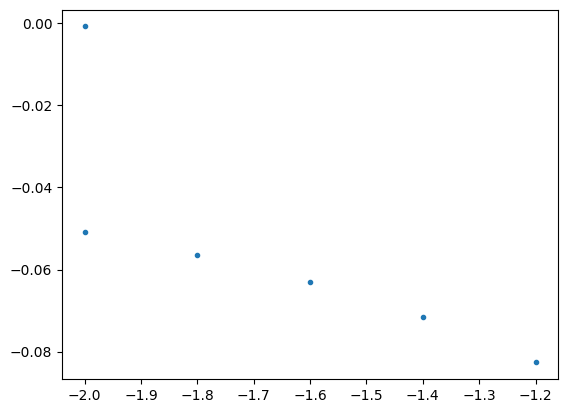

In [27]:
# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_abs_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params1, vals1, errs1 = sort_data(data)
plt.errorbar([m2 for m2 in params1], vals1, errs1, fmt='^-', markersize=6, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_abs_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params2, vals2, errs2 = sort_data(data)
plt.errorbar([m2*4 for m2 in params2], vals2, errs2, fmt='x-', markersize=5, label="s=1/2")

# s = 0.25
data, params, vals, errs = [[] for _ in range(4)]
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        val, err = s.compute_abs_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='^-', markersize=5, label="s=1/4")

# s = 0.125
'''data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        val, err = s.compute_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/8")

# s = 0.0625
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        val, err = s.compute_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/16")'''
plt.legend()
plt.grid()
plt.xlabel(r"$g$")
plt.ylabel(r"$\left\langle |\phi| \right\rangle$")
plt.tight_layout()
plt.savefig("magnetisation.pdf")
plt.close()

plt.plot(params1, [(v2-v1)/v1 for v1,v2 in zip(vals1, vals2)], '.')

# Condensate

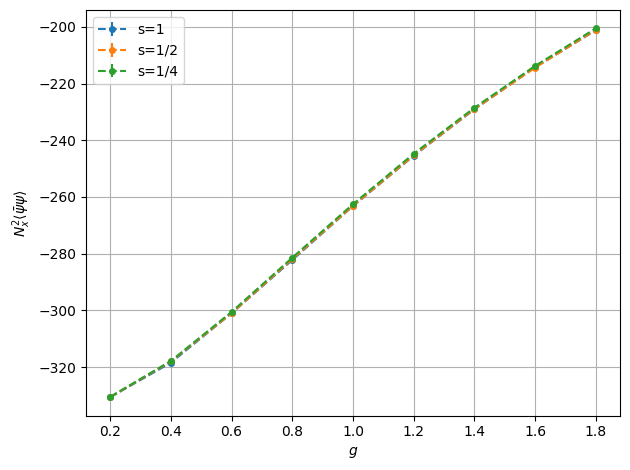

In [40]:
# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1 and s.toml_params[param[0]][param[1]] != 0.0:
        Nx = s.Nx
        cf = s.toml_params["physics"]["cutFraction"]
        val, err = s.compute_condensate()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*Nx*v for v in vals], errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5 and s.toml_params[param[0]][param[1]] != 0.0:
        Nx = s.Nx
        cf = s.toml_params["physics"]["cutFraction"]
        val, err = s.compute_condensate()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*Nx*v for v in vals], errs, fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25 and s.toml_params[param[0]][param[1]] != 0.0:
        Nx = s.Nx
        cf = s.toml_params["physics"]["cutFraction"]
        val, err = s.compute_condensate()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*Nx*v for v in vals], errs, fmt='o--', markersize=4, label="s=1/4")
'''
# s = 0.125
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125 and s.toml_params[param[0]][param[1]] != 0.0:
        Nx = s.Nx
        cf = s.toml_params["physics"]["cutFraction"]
        val, err = s.compute_condensate()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/8")

# s = 0.125
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.0625 and s.toml_params[param[0]][param[1]] != 0.0:
        Nx = s.Nx
        cf = s.toml_params["physics"]["cutFraction"]
        val, err = s.compute_condensate()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/16")
'''

plt.legend()
plt.grid()
plt.xlabel(r"$g$")
plt.ylabel(r"$ N_x^2 \left\langle\bar\psi \psi \right\rangle$")
plt.tight_layout()
plt.savefig("condensate.pdf")

# Susceptibility

Text(0, 0.5, '$\\chi^2$')

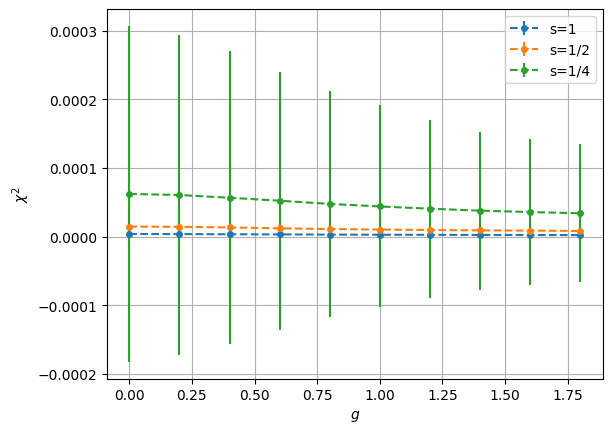

In [18]:

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v/s.Nx/s.Nt/s.Nx for v in vals], [e/s.Nx/s.Nt for e in errs], fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v/s.Nx/s.Nt/s.Nx for v in vals], [e/s.Nx/s.Nt for e in errs], fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [v/s.Nx/s.Nt/s.Nx for v in vals], [e/s.Nx/s.Nt for e in errs], fmt='o--', markersize=4, label="s=1/4")

# s = 0.125
'''data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], vals, errs, fmt='o--', markersize=4, label="s=1/8")

# s = 0.0625
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], vals, errs, fmt='o--', markersize=4, label="s=1/16")'''

plt.legend()
plt.grid()
plt.xlabel(r"$g$")
plt.ylabel(r"$\chi^2$")
plt.tight_layout()

# Renormalised boson mass

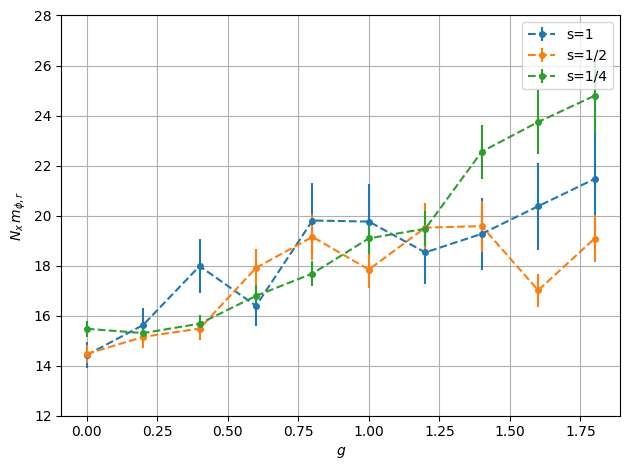

In [36]:
# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mphir()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mphir()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/2")

# s = 0.25
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        Nx = s.Nx
        val, err = s.compute_mphir()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/4")
'''
# s = 0.125
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/8")

# s = 0.0625
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/16")'''

plt.legend()
plt.grid()
plt.ylim([12,28])
plt.xlabel(r"$g$")
plt.ylabel(r"$ N_x \, m_{\phi, r} $");
plt.tight_layout()
plt.savefig("mqphir.pdf")

# Physical quark mass

0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8
0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8
0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
1.4000000000000001
1.6
1.8


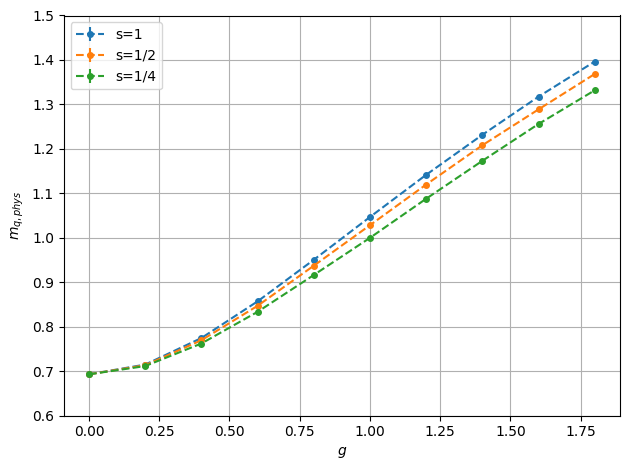

In [41]:
# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mqphys(plotting=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [v for v in vals], np.abs(errs), fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mqphys(plotting=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/2")


# s = 0.25
data = []
for s in simulations:
    print(s.toml_params["fermions"]["yukawa_coupling"])
    if s.toml_params["physics"]["cutFraction"] == 0.25:
        Nx = s.Nx
        if s.toml_params["fermions"]["yukawa_coupling"] in [1.6, 1.2000000000000002]:
            val, err = s.compute_mqphys(plotting=False, func="exp", interval=[1,20])
        else:
            val, err = s.compute_mqphys(plotting=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [v for v in vals], np.abs(errs), fmt='o--', markersize=4, label="s=1/4")
'''
# s = 0.125
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        Nx = s.Nx
        val, err = s.compute_mqphys(plotting=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/8")

# s = 0.0625
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.125:
        Nx = s.Nx
        val, err = s.compute_mqphys(plotting=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([g for g in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/16")'''


plt.legend()
plt.grid()
plt.xlabel(r"$g$")
plt.ylabel(r"$m_{q, phys} $")
plt.ylim([0.6, 1.5])
plt.tight_layout()
plt.savefig("mqphys.pdf")